In [ ]:
##########################################################
# DSC5103 Statistics
# Session 6. Demo of Cross-Validation
# 2016.11
##########################################################

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix
import sklearn.cross_validation
import seaborn as sns
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [2]:
Auto = pd.read_csv('Auto.csv')

In [3]:
Auto.shape

(392, 9)

In [4]:
#############################
### The Validation Set Approach (50-50)
#############################

In [4]:
RUN = 10  # the number of repetitions
I = 10  # the max polynomical order to consider

In [5]:
# prepare an empty data.frame to save the MSE for each *i* and *run*
i1, run1 = np.meshgrid(np.arange(1, I+0.1, 1), np.arange(1, RUN+0.1, 1))

In [6]:
# convert multi-dimensional array into one dimentsion
i1 = i1.reshape(-1)
run1 = run1.reshape(-1)

In [7]:
mse_validation = pd.DataFrame({'i': i1, 'run': run1})
mse_validation['mse'] = 0

In [122]:
print(mse_validation.head())

     i  run        mse
0  1.0  1.0  64.905503
1  2.0  1.0  24.802121
2  3.0  1.0  18.848293
3  4.0  1.0  18.805111
4  5.0  1.0  18.711722


In [9]:
X4 = PolynomialFeatures(4).fit_transform(Auto.horsepower.reshape(-1,1))

In [10]:
fit1 = sm.OLS(Auto.mpg, X4).fit() #in R: fit1 <- lm(mpg ~ poly(horsepower, 4, raw = TRUE), data=Auto)
# alternatively, fit1 = sm.GLS(Auto.mpg, X4).fit()
### when the power >= 6, the result is no longer the same as in R...
### also different with sklearn
# from sklearn.linear_model import LinearRegression
# clf = LinearRegression()
# clf.fit(PolynomialFeatures(4).fit_transform(Auto.horsepower.reshape(-1,1)), Auto.mpg.values)
# clf.coef_
print(fit1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     214.7
Date:                Mon, 28 Nov 2016   Prob (F-statistic):           7.67e-97
Time:                        10:48:54   Log-Likelihood:                -1132.1
No. Observations:                 392   AIC:                             2274.
Df Residuals:                     387   BIC:                             2294.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         47.5677     11.960      3.977      0.0

In [83]:
# start fitting models
np.random.seed(1)
for run in np.arange(1, RUN+0.1, 1, dtype=np.int_):
    train, test = sklearn.cross_validation.train_test_split(Auto, test_size=0.5) #random_state = 5 can be set
    for i in np.arange(1, I+0.1, 1, dtype=np.int_):
        fit = sm.OLS(train.mpg, PolynomialFeatures(i).fit_transform(train.horsepower.reshape(-1,1))).fit()
        pred = fit.predict(PolynomialFeatures(i).fit_transform(test.horsepower.reshape(-1,1)))
        mse = np.mean((test.mpg - pred)**2)
        mse_validation.loc[(mse_validation['i'] == i) & (mse_validation['run'] == run), 'mse'] = mse

In [84]:
print(mse_validation)

       i   run        mse
0    1.0   1.0  64.905503
1    2.0   1.0  24.802121
2    3.0   1.0  18.848293
3    4.0   1.0  18.805111
4    5.0   1.0  18.711722
5    6.0   1.0  18.324156
6    7.0   1.0  18.358696
7    8.0   1.0  18.403110
8    9.0   1.0  22.327910
9   10.0   1.0  36.801380
10   1.0   2.0  56.968271
11   2.0   2.0  24.802121
12   3.0   2.0  18.848293
13   4.0   2.0  18.805111
14   5.0   2.0  18.711722
15   6.0   2.0  18.324156
16   7.0   2.0  18.358696
17   8.0   2.0  18.403110
18   9.0   2.0  22.327910
19  10.0   2.0  36.801380
20   1.0   3.0  56.461312
21   2.0   3.0  22.512987
22   3.0   3.0  17.061527
23   4.0   3.0  17.007559
24   5.0   3.0  16.997017
25   6.0   3.0  16.599761
26   7.0   3.0  16.320615
27   8.0   3.0  15.543748
28   9.0   3.0  18.091184
29  10.0   3.0  30.532577
..   ...   ...        ...
70   1.0   8.0  59.097090
71   2.0   8.0  23.940968
72   3.0   8.0  19.196850
73   4.0   8.0  19.239148
74   5.0   8.0  19.231892
75   6.0   8.0  18.782736
76   7.0   8

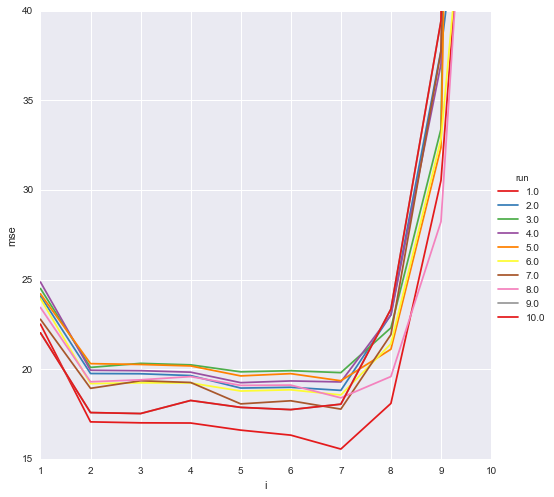

In [20]:
# plot X and Y with seaborn
# http://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sns.FacetGrid(mse_validation, hue='run', palette="Set1", size = 7, ylim=(15, 40))
g.map(plt.plot, 'i', 'mse').add_legend()

In [ ]:
#############################
### Leave-One-Out Cross-Validation
#############################

In [102]:
from sklearn.cross_validation import LeaveOneOut
for train, test in LeaveOneOut(10): # split data into train/test groups, 10 times
    print("TRAIN:", train, "TEST:", test)

TRAIN: [1 2 3 4 5 6 7 8 9] TEST: [0]
TRAIN: [0 2 3 4 5 6 7 8 9] TEST: [1]
TRAIN: [0 1 3 4 5 6 7 8 9] TEST: [2]
TRAIN: [0 1 2 4 5 6 7 8 9] TEST: [3]
TRAIN: [0 1 2 3 5 6 7 8 9] TEST: [4]
TRAIN: [0 1 2 3 4 6 7 8 9] TEST: [5]
TRAIN: [0 1 2 3 4 5 7 8 9] TEST: [6]
TRAIN: [0 1 2 3 4 5 6 8 9] TEST: [7]
TRAIN: [0 1 2 3 4 5 6 7 9] TEST: [8]
TRAIN: [0 1 2 3 4 5 6 7 8] TEST: [9]


In [110]:
mse_LOOCV = pd.DataFrame({'i': np.arange(1, 10.1, 1, dtype=np.int_)})
mse_LOOCV['mse'] = 0

In [112]:
I = 10
np.random.seed(1)
for i in np.arange(1, I+0.1, 1, dtype=np.int_):
    error = 0
    for train, test in LeaveOneOut(392): 
        fit = sm.OLS(Auto.mpg[train].values, PolynomialFeatures(i).fit_transform(Auto.horsepower[train].values.reshape(-1,1))).fit()
        pred = fit.predict(PolynomialFeatures(i).fit_transform(Auto.horsepower[test].values.reshape(-1,1)))
        error += np.sum((Auto.mpg[test].values - pred)**2)
    mse = error / 392
    mse_LOOCV.loc[(mse_LOOCV['i'] == i), 'mse'] = mse

In [114]:
print(mse_LOOCV)

    i        mse
0   1  24.231514
1   2  19.248213
2   3  19.334984
3   4  19.424430
4   5  19.033226
5   6  19.002074
6   7  18.996090
7   8  23.214068
8   9  38.918458
9  10  76.042501


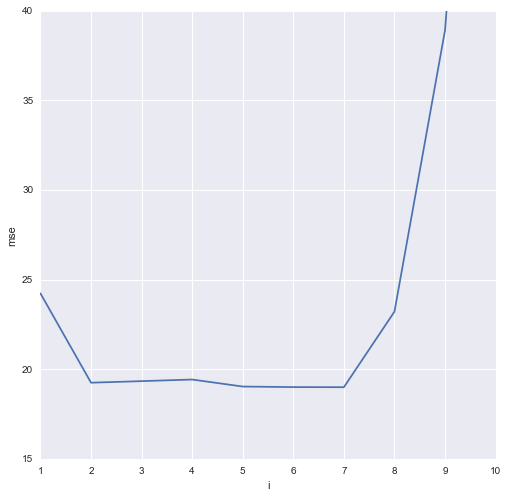

In [116]:
# plot X and Y with seaborn
# http://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g1 = sns.FacetGrid(mse_LOOCV, palette="Set1", size = 7, ylim=(15, 40))
g1.map(plt.plot, 'i', 'mse').add_legend()

In [ ]:
#############################
### k-Fold Cross-Validation
#############################

In [21]:
# prepare an empty data.frame to save the MSE for each *i* and *run*
mse_kfold = pd.DataFrame({'i': i1, 'run': run1})
mse_kfold['mse'] = 0

In [87]:
from sklearn.cross_validation import KFold
for train, test in KFold(10, 3, shuffle=True): # split data into train/test groups, 10 times
    print("TRAIN:", train, "TEST:", test)

TRAIN: [0 1 3 5 7 8] TEST: [2 4 6 9]
TRAIN: [2 4 5 6 7 8 9] TEST: [0 1 3]
TRAIN: [0 1 2 3 4 6 9] TEST: [5 7 8]


In [117]:
error = 0
d = 10
for train, test in KFold(392, n_folds, shuffle=True): # split data into train/test groups, 10 times
    fit = sm.OLS(Auto.mpg[train].values, PolynomialFeatures(d).fit_transform(Auto.horsepower[train].values.reshape(-1,1))).fit()
    pred = fit.predict(PolynomialFeatures(d).fit_transform(Auto.horsepower[test].values.reshape(-1,1)))
    diff = Auto.mpg[test].values - pred
    error += np.sum((Auto.mpg[test].values - pred)**2)
    print("true:", Auto.mpg[test].values, "TEST:", pred, "diff:", diff, "error:", error)

true: [ 17.   15.   14.   27.   13.   26.   28.   23.   14.   19.   15.   16.
  26.   18.   21.   29.   20.   17.5  20.   31.5  33.5  20.5  15.5  24.5
  33.5  19.2  19.2  21.5  17.   18.5  41.5  43.4  32.4  30.   32.4  29.
  38.   38.   22.   36. ] TEST: [ 11.5053056   -0.57244422  24.58033851  29.50171894  18.33953953
  25.80811604  28.36829015  26.14930541  15.99386096  16.74279121
  15.99386096  18.02827657  28.53582104  27.13216855  18.02827657
  28.53582104  24.47843508  11.5053056   24.47843508  25.24066021
  26.34624186  21.33201474  19.97221195  29.50171894  29.98972576
  21.33201474  13.55992198  14.9239343    9.87215747  15.99386096
  28.86287878  11.05245426  27.32720295  29.97829302  28.53582104
  29.97829302  24.64581473  24.64581473  16.74279121  29.97829302] diff: [  5.49469440e+00   1.55724442e+01  -1.05803385e+01  -2.50171894e+00
  -5.33953953e+00   1.91883962e-01  -3.68290146e-01  -3.14930541e+00
  -1.99386096e+00   2.25720879e+00  -9.93860962e-01  -2.02827657e+00
  -

In [118]:
error/392

76.745879052182502

In [96]:
n_folds=10
I = 10
RUN = 10
np.random.seed(1)
for run in np.arange(1, RUN+0.1, 1, dtype=np.int_):
    for i in np.arange(1, I+0.1, 1, dtype=np.int_):
        error = 0
        for train, test in KFold(392, n_folds, shuffle=True): # split data into train/test groups, 10 times
            fit = sm.OLS(Auto.mpg[train].values, PolynomialFeatures(i).fit_transform(Auto.horsepower[train].values.reshape(-1,1))).fit()
            pred = fit.predict(PolynomialFeatures(i).fit_transform(Auto.horsepower[test].values.reshape(-1,1)))
            error += np.sum((Auto.mpg[test].values - pred)**2)
        mse = error / 392
        mse_kfold.loc[(mse_validation['i'] == i) & (mse_validation['run'] == run), 'mse'] = mse

In [120]:
print(mse_kfold)

       i   run        mse
0    1.0   1.0  24.117453
1    2.0   1.0  19.333658
2    3.0   1.0  19.292331
3    4.0   1.0  19.716811
4    5.0   1.0  19.068518
5    6.0   1.0  19.056573
6    7.0   1.0  18.876307
7    8.0   1.0  23.266822
8    9.0   1.0  38.325564
9   10.0   1.0  94.024512
10   1.0   2.0  24.127702
11   2.0   2.0  19.262550
12   3.0   2.0  19.310451
13   4.0   2.0  19.318884
14   5.0   2.0  19.173792
15   6.0   2.0  18.797254
16   7.0   2.0  19.003275
17   8.0   2.0  23.360838
18   9.0   2.0  38.565522
19  10.0   2.0  92.812087
20   1.0   3.0  24.484797
21   2.0   3.0  19.225584
22   3.0   3.0  19.437055
23   4.0   3.0  19.459182
24   5.0   3.0  19.145379
25   6.0   3.0  19.130318
26   7.0   3.0  19.317135
27   8.0   3.0  23.129467
28   9.0   3.0  38.741281
29  10.0   3.0  75.839731
..   ...   ...        ...
70   1.0   8.0  24.215683
71   2.0   8.0  19.288991
72   3.0   8.0  19.375572
73   4.0   8.0  19.328959
74   5.0   8.0  19.248091
75   6.0   8.0  18.919451
76   7.0   8

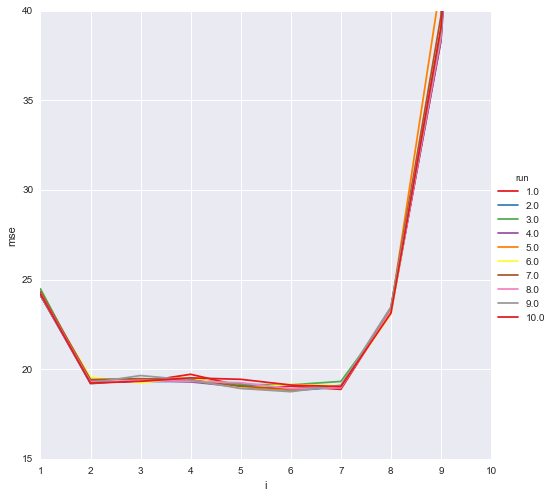

In [98]:
# plot X and Y with seaborn
# http://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g1 = sns.FacetGrid(mse_kfold, hue='run', palette="Set1", size = 7, ylim=(15, 40))
g1.map(plt.plot, 'i', 'mse').add_legend()